# Prediction Food Groups 

PCA analysis for Feature Reduction

Logistic Model for Prediction

In [122]:
import pandas as pd

In [123]:
Nutrition = pd.read_csv('D:\\Data for Preprocessing\\Nutrition Dataset.csv')
Nutrition

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA,Classification
0,40,2.38,1.59,4.76,0.79,0.0,0,0.000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
1,56,2.38,1.98,7.94,0.79,0.8,0,0.000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
2,56,2.38,1.59,8.73,0.79,0.8,0,0.000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
3,16,0.81,0.81,0.81,0.81,0.0,0,0.000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
4,48,1.59,0.79,7.94,1.59,0.8,0,0.000,0.0,0.0,...,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,296,3.74,14.82,36.90,0.00,4.1,0,0.282,0.0,1.1,...,0.174813,0.049231,0.089167,0.015833,0.000128,0.073810,0.172857,0.007273,0.051818,24
8614,289,3.49,14.04,37.20,0.28,3.9,0,0.236,0.0,1.1,...,0.160250,0.043846,0.091667,0.014167,0.000124,0.069048,0.177143,0.007273,0.046364,24
8615,255,3.26,13.18,30.87,0.86,3.5,0,0.236,0.0,0.9,...,0.151062,0.043077,0.097500,0.015833,0.000137,0.076190,0.167143,0.000000,0.038182,24
8616,282,3.41,14.13,35.20,0.85,3.5,0,0.220,0.0,1.6,...,0.169813,0.036923,0.100000,0.011667,0.000123,0.064286,0.164286,0.007273,0.041818,24


In [124]:
# Calculate Central tendency values
Nutrition.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA,Classification
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,...,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111,12.013460
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,...,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292,6.176887
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,...,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909,7.000000
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,...,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818,13.000000
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,...,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455,17.000000
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,...,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182,24.000000


In [125]:
# Analyse Column values
Nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Energy_kcal       8618 non-null   int64  
 1   Protein_g         8618 non-null   float64
 2   Fat_g             8618 non-null   float64
 3   Carb_g            8618 non-null   float64
 4   Sugar_g           8618 non-null   float64
 5   Fiber_g           8618 non-null   float64
 6   VitA_mcg          8618 non-null   int64  
 7   VitB6_mg          8618 non-null   float64
 8   VitB12_mcg        8618 non-null   float64
 9   VitC_mg           8618 non-null   float64
 10  VitE_mg           8618 non-null   float64
 11  Folate_mcg        8618 non-null   int64  
 12  Niacin_mg         8618 non-null   float64
 13  Riboflavin_mg     8618 non-null   float64
 14  Thiamin_mg        8618 non-null   float64
 15  Calcium_mg        8618 non-null   int64  
 16  Copper_mcg        8618 non-null   float64


In [126]:
# split data into inputs and outputs
X = Nutrition.iloc[:, :-1]
y = Nutrition.iloc[:, -1]
print(X.shape, y.shape)


(8618, 38) (8618,)


 Evaluate pca with logistic regression algorithm for classification

In [127]:
# Import Library
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import numpy as np

In [129]:
# define the pipeline
steps = [('norm', MinMaxScaler()), ('pca', PCA(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [130]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


In [131]:
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.427 (0.011)


PCA transform with logistic regression achieved a performance of about 42.7 percent

 Compare PCA number of components with logistic regression algorithm for classification

In [103]:
def get_dataset():
    X = Nutrition.iloc[:, :-1]
    y = Nutrition.iloc[:, -1]
    return X,y

In [107]:
# get a list of models to evaluate
def get_models():
 models = dict()
 for i in range(1,39):
    steps = [('norm', MinMaxScaler()), ('pca', PCA(n_components=i)), ('m', LogisticRegression())]
    models[str(i)] = Pipeline(steps=steps)
 return models


In [108]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

>1 0.218 (0.007)
>2 0.340 (0.006)
>3 0.385 (0.007)
>4 0.404 (0.008)
>5 0.408 (0.007)
>6 0.413 (0.008)
>7 0.416 (0.009)
>8 0.418 (0.009)
>9 0.423 (0.010)
>10 0.427 (0.011)
>11 0.429 (0.012)
>12 0.431 (0.012)
>13 0.433 (0.012)
>14 0.434 (0.012)
>15 0.433 (0.013)
>16 0.434 (0.013)
>17 0.435 (0.013)
>18 0.436 (0.013)
>19 0.437 (0.012)
>20 0.438 (0.012)
>21 0.438 (0.013)
>22 0.439 (0.012)
>23 0.439 (0.012)
>24 0.439 (0.012)
>25 0.439 (0.012)
>26 0.439 (0.012)
>27 0.439 (0.012)
>28 0.439 (0.012)
>29 0.439 (0.012)
>30 0.439 (0.012)
>31 0.439 (0.012)
>32 0.439 (0.012)
>33 0.439 (0.012)
>34 0.439 (0.012)
>35 0.439 (0.012)
>36 0.439 (0.012)
>37 0.439 (0.012)
>38 0.439 (0.012)


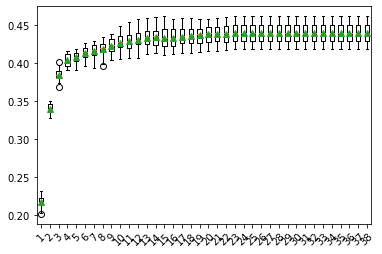

In [109]:

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
 # plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()


We can see the trend of increasing classification accuracy with the number of components, with a limit at 22

In [114]:
import matplotlib.pyplot as plt


Make predictions using pca with 22 Number of component logistic regression

In [134]:
# Make predictions using pca with logistic regression
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# split data into inputs and outputs
X_new = Nutrition.iloc[:, :-1]
y_new = Nutrition.iloc[:, -1]
print(X_new.shape, y_new.shape)
# define the model
steps_new = [('norm', MinMaxScaler()), ('pca', PCA(n_components=22)), ('m', LogisticRegression())]
model_new= Pipeline(steps=steps_new)
# fit the model on the whole dataset
model_new.fit(X_new, y_new)
# make a single prediction
row = [[253.25,	2.99375,	13.93, 28.97,	0.96875,	2.8875,	0,	0.196375,	0,	5.375	,1.20625,	0,	2.05575,	0.04875,	0.078375,	14.5,	0.08925,	0.67625,	23.75,	0.1865,	97.875,	0.2125,	0.41,	0,	0.115514706,	0,	0.059722222,	0.080416667,	0,	0.128484375,	0.0375,	0.0653125,	0.012083333,	9.91628E-05,	0.056547619,	0.139821429,	0.003863636,	0.037272727]]
yhat = model_new.predict(row)
print('Predicted Class: %d' % yhat[0])


(8618, 38) (8618,)
Predicted Class: 18


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comment -

Fit the Pipeline on available data and makes a prediction on new data.
Transform uses 22 most important components from PCA transform, as we found from testing above.
a new row of data with 20 columns is provided and is automatically transformed to 22 components 
and fed to the logistic regression model in order to predict the class label

ANS - Predicted class = 18